# Housing Project


The goal of this project is to develop a model that will predict house prices in King County as accurate as possible

# Importing Libraries

In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Loading Data

Let's load our data and take a quick look 

In [332]:
# Loading data into pandas DataFrame
df = pd.read_csv('data/kc_house_data.csv')

In [333]:
pd.set_option("display.max_columns",100)
pd.set_option('display.max_rows', 100)

In [334]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We've given a dataset with housing prices and other features, such as size of the house, how many bedrooms, overall condition and others. Let's take a look at features we have and their meaning:


- **id** - A notation for a house
- **date** - Date house was sold
- **price** - Price is prediction target
- **bedrooms** - Number of Bedrooms/House
- **bathrooms** - Number of bathrooms/bedrooms
- **sqft_living** - Square footage of the home
- **sqft_lot**- Square footage of the lot
- **floors** - Total floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( Overall )
- **grade**- Overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - Zipcode
- **lat**- Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - Living room area in 2015 (implies-- some renovations) This might or might not have affected the lotsize area
- **sqft_lot15** - Lot size area in 2015 (implies-- some renovations)



# Cleaning the Data

During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers and normalizing data. 

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [336]:
#checking the size of the data
df.shape

(21597, 21)

In [337]:
#checking the summary
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [338]:
# Function to differntiate continuous and catergorical variables
conts = []
cats = []
for col in df.columns:
    if(df[col].nunique() < 25):
        cats.append(col)
    else:
        conts.append(col)
print('Continuous variables:', conts)  
print('Categorical variables:', cats)

Continuous variables: ['id', 'date', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Categorical variables: ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']


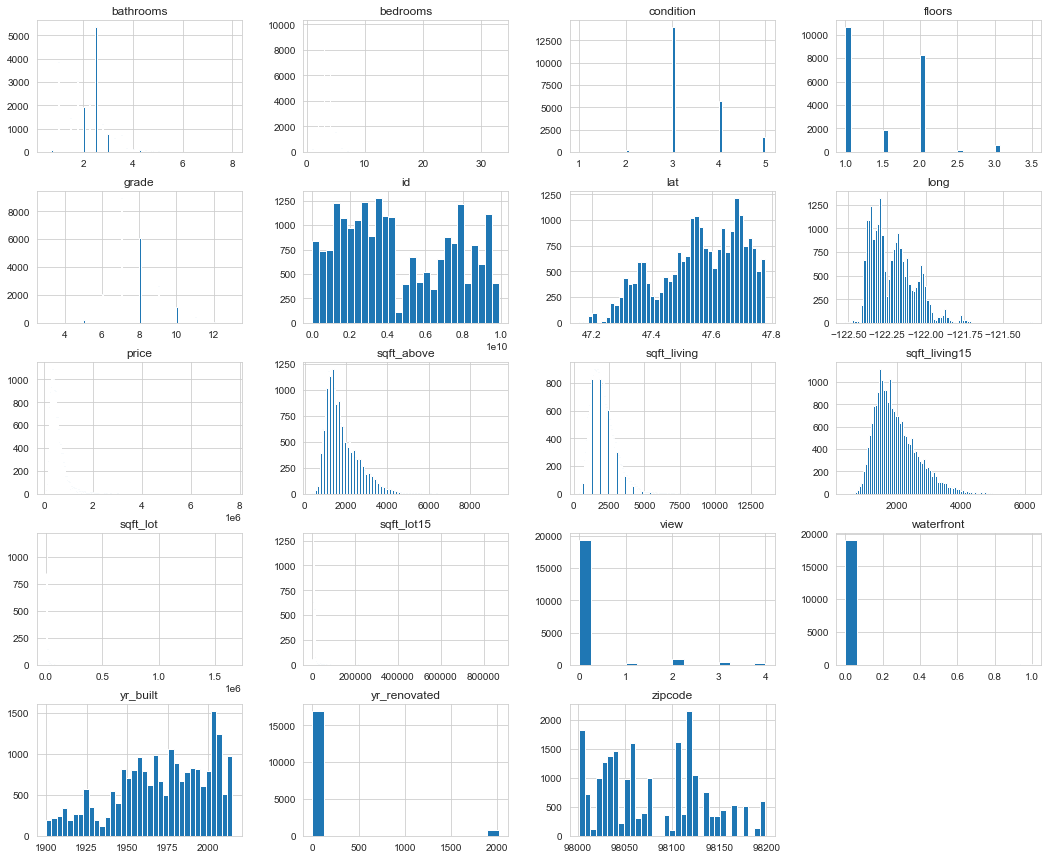

In [339]:
df.hist(figsize=(18,15), bins='auto');

Checking correlation between the features of dataframe.

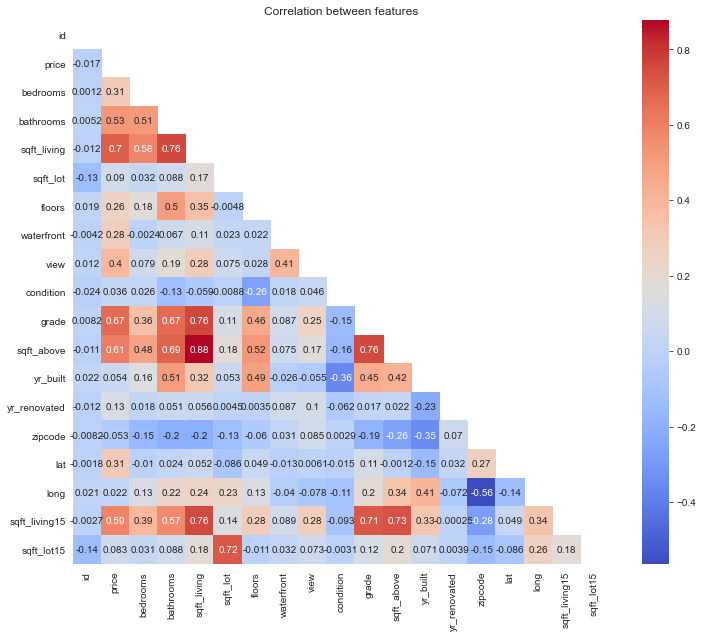

In [340]:
plt.figure(figsize=(12,10))
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', annot=True)
plt.title('Correlation between features')
plt.show()

- The darkest red outputs illustrate the strongest positive linear relationships as far as we can strictly from
correlation coefficients and the blue values are the negative linear relationships.
- The values that describe each house's sqft_living and grade,sqft_living and price are often strongly
correlated with each other
- There is strong correlation between sqft_living and sqft_above, it would be reasonable to remove one of them.

In [341]:
#dropping the sqft_above column
df.drop(columns=["sqft_above"], inplace= True)

In [342]:
#checking for the null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Noticed Null values in the features waterfront, view and yr_renovated.

Function to find the value_counts of columns in dataframe.

In [343]:
#Function for value_counts of columns
for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize = True, ascending=False).head(5))
    print("-------------------------------------------------------------")

id
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64
-------------------------------------------------------------
date
6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64
-------------------------------------------------------------
price
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64
-------------------------------------------------------------
bedrooms
3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64
-------------------------------------------------------------
bathrooms
2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64
-------------------------------------------------------------
sqft_living
1300    0.006390


# Feature Engineering

Most of the data looks good except sqft_basement and date features. Both have object type, which means they presented as string values.

Let's convert sqft_basement into float type, and date into datetime.

In [344]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)


In [345]:
# Checking for unusual values
df.sqft_basement.value_counts()[:10]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
Name: sqft_basement, dtype: int64

In [346]:
#Replacing '?' with '0' value
df['sqft_basement'] = df.sqft_basement.replace(to_replace='?', value = 0.0)
df.sqft_basement = df.sqft_basement.astype('float')

In [347]:
df.sqft_basement.value_counts()[:10]

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
2110.0        2
1730.0        2
2030.0        2
2100.0        2
10.0          2
Name: sqft_basement, Length: 210, dtype: int64

Handling the null values of waterfront, view and yr_renovated.

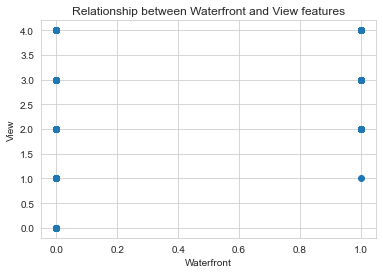

In [348]:
sns.set_style('whitegrid')
plt.scatter(df.waterfront, df.view)
plt.title('Relationship between Waterfront and View features')
plt.xlabel('Waterfront')
plt.ylabel('View')
plt.show()

 It shows that houses with 0 views also have 0 waterfront. We can confidently replace Waterfront null values when View feature also has 0. But before we do that lets see how many records we would cover of all null values

In [349]:
print('Percentage of null values we can replace confidently:',
      round( len(df[ (df.waterfront.isna()) & (df.view==0) ])/sum(df.waterfront.isna())*100, 2), '%' )

Percentage of null values we can replace confidently: 88.8 %


Since most of the waterfront records have value 0 and 88.8% of ? we can confidently replace with 0 also, lets go ahead and replace all of them with 0

In [350]:
df.loc[df.waterfront.isna(), 'waterfront'] = 0
df.waterfront = df.waterfront.astype('int')

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


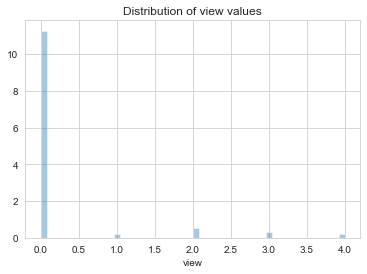

In [351]:
sns.distplot( df[df.view.notna()]['view'] )
plt.title('Distribution of view values')
plt.show()


The view feature has only 63 null values out of 21534, and the plot suggests that most of the values are zeros,
so let's just replace them with 0 as well, since it's not gonna affect our model

In [352]:
df.loc[df.view.isna(), 'view'] = 0
df.view = df.view.astype('int')

In [353]:
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0

Some of the houses were sold multiple times due to renovation. Let's see how price changed and check if there is any changes to renovated houses.

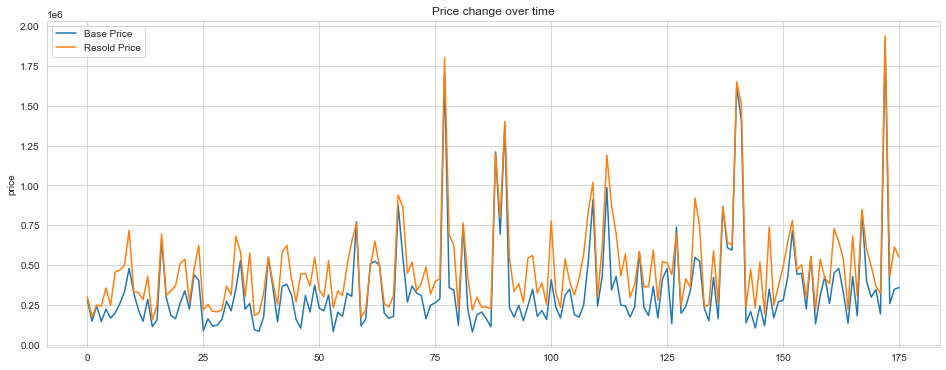

Price increase after renovation: 28 %


In [354]:
duplicates = df[ df.id.duplicated(keep=False) ]
prices = duplicates.groupby('id')['price']

plt.figure(figsize=(16,6))
sns.lineplot( range(len(prices)), prices.first(), label='Base Price' )
sns.lineplot( range(len(prices)), prices.last(), label='Resold Price' )
plt.title('Price change over time')
plt.legend()
plt.show()

print('Price increase after renovation:',round( ( 1 - ( prices.first().mean() / prices.last().mean() ) ) * 100 ),'%' )


Plot suggests that most of renovated houses were sold for a higher price (28% higher on average) in period from 2014 to 2015


In [355]:
#checking the changes in the house
print('Mean house size before renovation:',round(df.sqft_living.mean()),'. After:', round(df.sqft_living15.mean()) )
print('Mean lot size before renovation:',round(df.sqft_lot.mean()),'. After:', round(df.sqft_lot.mean()) )

Mean house size before renovation: 2080 . After: 1987
Mean lot size before renovation: 15099 . After: 15099


Resold houses were reduced in living space after renovation, but lot size generally stayed the same. So
dropping the features sqft_living15, sqft_lot_15 and also dropping id from dataframe.

In [356]:
# Dropping features from dataframe.
df.drop(['id','sqft_living15','sqft_lot15'], axis=1, inplace=True)

**Best Month to sell the house**

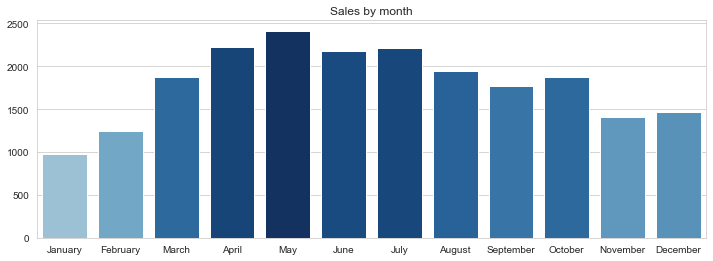

In [357]:
#plotting the bar graph to check the month with most sales.
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(df.date.dt.month == i))
    
plt.figure(figsize=(12,4))
norm = plt.Normalize(0,max(monthly_sales))
colors = plt.cm.Blues(norm(monthly_sales))

sns.barplot(months, monthly_sales, palette=colors)
plt.title('Sales by month')
plt.show()

Best months to sell house is May, April and July.

Usually location plays considerable role in forming house price. Below you can find locations of houses that has been sold and their price ranges

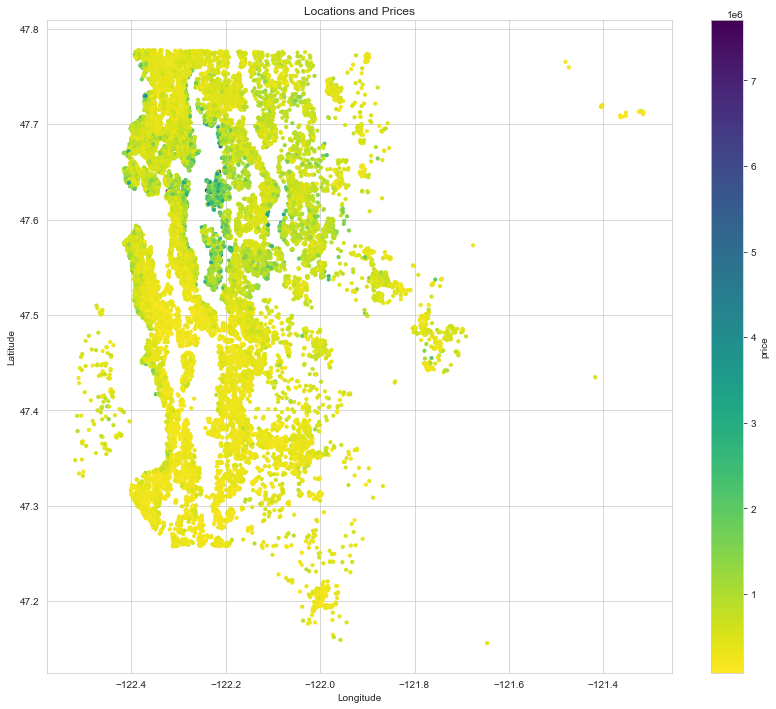

In [358]:
#plotting a Scatterplot of king county, longitude with latitude on the price range
plt.figure(figsize=(14,12))
plt.scatter(x='long', y='lat', c='price' , data=df, s=10, cmap='viridis_r')
plt.colorbar().set_label('price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations and Prices')
plt.show()

sqft_living has the best correlation with price, but as size of the house goes up, we see more broader price range. Let's explore how other features impact price along with sqft_living

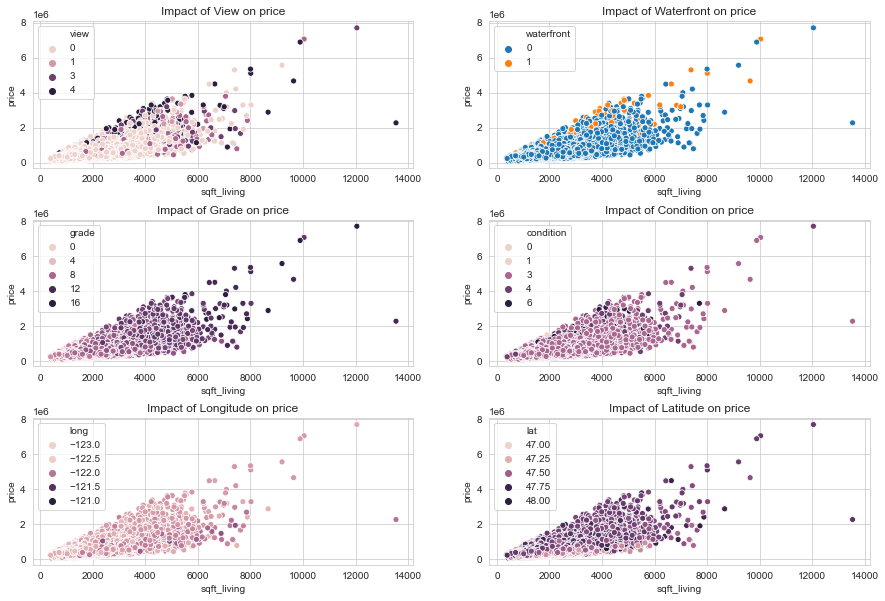

In [359]:
#creating scatter plot of price with sqft_living with different hue
plt.figure(figsize=(15,10))

plt.subplot(321)
sns.scatterplot(x='sqft_living', y= 'price', hue='view', data = df)
plt.title('Impact of View on price')
plt.subplot(322)
sns.scatterplot(x='sqft_living', y='price', hue='waterfront', data= df)
plt.title('Impact of Waterfront on price')
plt.subplot(323)
sns.scatterplot(x='sqft_living', y='price', hue='grade',data =df)
plt.title('Impact of Grade on price')
plt.subplot(324)
sns.scatterplot(x='sqft_living', y='price', hue='condition',data= df)
plt.title('Impact of Condition on price')
plt.subplot(325)
sns.scatterplot(x='sqft_living', y='price', hue='long', data= df)
plt.title('Impact of Longitude on price')
plt.subplot(326)
sns.scatterplot(x='sqft_living', y='price', hue='lat',data=df)
plt.title('Impact of Latitude on price')

plt.subplots_adjust(hspace=0.35)
plt.show()


Now lets explore how  house price correlated with other features

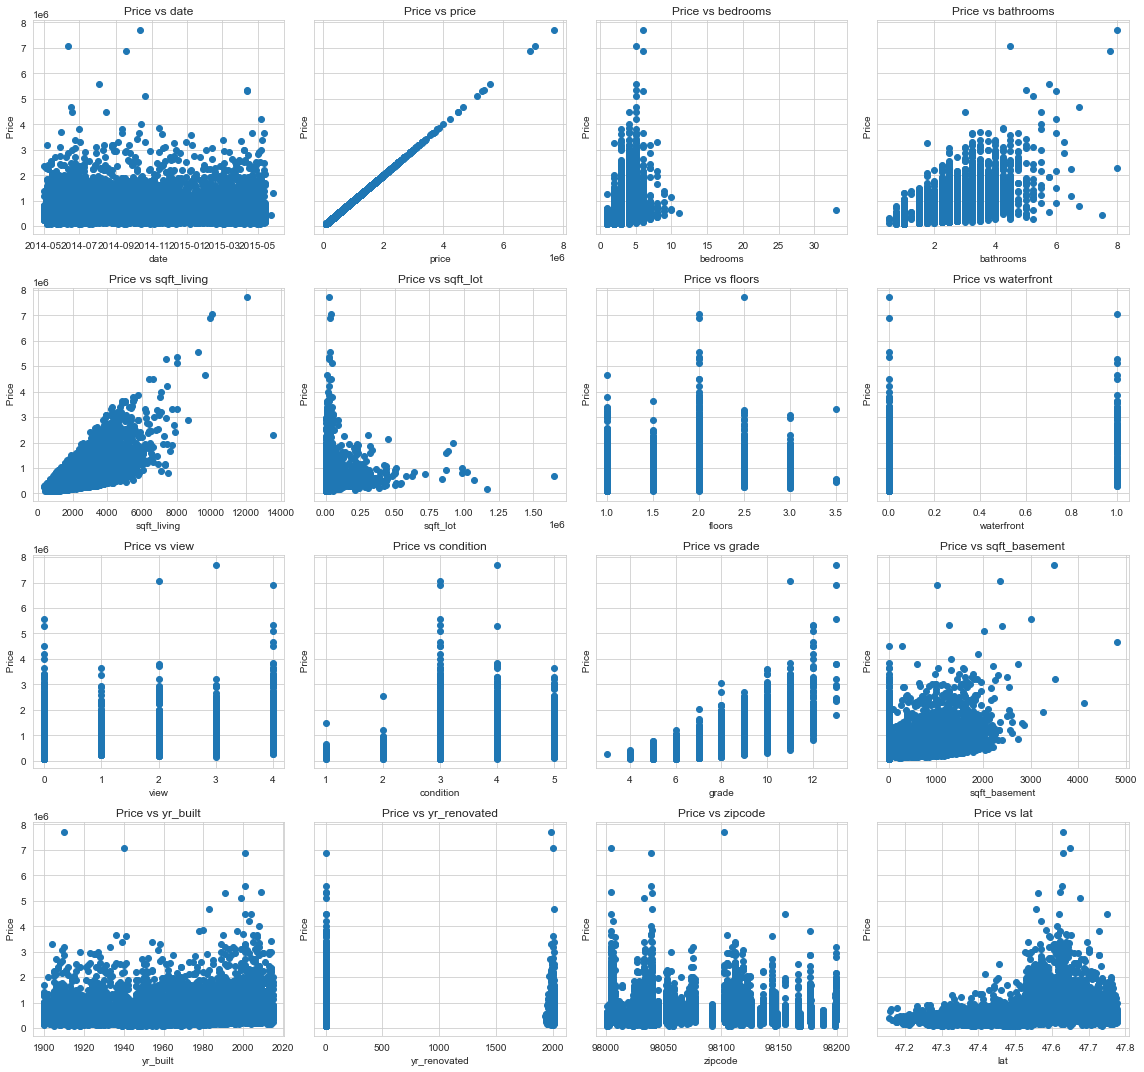

In [360]:
#creating a scatter plot to check the correlation of price to other features
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'], label=column)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel(' Price')

fig.tight_layout()

The scatter plots above shows the relation between the house price and other features. Some features as the linear relationship
with price like bedrooms, bathrooms,sqft_living. It's interesting that sqft_lot doesn't seem to have that relationship.
The plots also show the relationship of the categorical variables.


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int32         
 8   view           21597 non-null  int32         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_basement  21597 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            2159

# Building a Linear Regression Model


We could explore Linear regression for all variables vs. price to see how they affect saleprice individually (R squared)
and also verify if the independent variables selected are statistically significant (p-value....the lower they 
are for the corresponding variables the more statistically significant they are).

In [362]:
#dropping the date from dataframe
df.drop(['date'], axis =1, inplace=True)

In [363]:
import statsmodels.formula as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df.drop(['price'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model_1 = ols(formula= f, data = df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3340.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:28:16   Log-Likelihood:            -2.9443e+05
No. Observations:               21597   AIC:                         5.889e+05
Df Residuals:                   21581   BIC:                         5.890e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.804e+06   2.88e+06      3.401      0.001    4.15e+06    1.55e+07
bedrooms      -3.563e+04   1902.127    -18.731      0.000   -3.94e+04   -3.19e+04
bathrooms      4.075e+04   3262.686     12.488      0.000    3.44e+04    4.71e+04
sqft_living     187.2659      3.355     55.825      0.000     180.691     193.841
sqft_lot         -0.0535      0.035     -1.535      0.125      -0.122       0.015
floors         6911.1348   3562.863      1.940      0.052     -72.341    1.39e+04
waterfront     6.146e+05   1.82e+04     33.846      0.000    5.79e+05     6.5e+05
view           5.496e+04   2097.980     26.199      0.000    5.09e+04    5.91e+04
condition      2.577e+04   2347.721     10.978      0.000    2.12e+04    3.04e+04
grade          1.013e+05   2071.640     48.903      0.000    9.72e+04    1.05e+05
sqft_basement   -30.6151      4.287     -7.141      0.000     -39.019     -22.211
yr_built      -2652.8607     72.042    -36.824      0.000   -2794.069   -2511.652
yr_renovated     22.1574      3.981      5.566      0.000      14.355      29.960
zipcode        -606.4588     32.906    -18.430      0.000    -670.956    -541.961
lat            6.042e+05   1.07e+04     56.260      0.000    5.83e+05    6.25e+05
long          -2.084e+05    1.3e+04    -16.082      0.000   -2.34e+05   -1.83e+05
==============================================================================
Omnibus:                    18133.223   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1738479.227
Skew:                           3.509   Prob(JB):                         0.00
Kurtosis:                      46.390   Cond. No.                     2.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [364]:
#Fuction for the linear regression
def linear_regression(df):

    data = df.copy()

    y = data['price']
    X = data.drop(['price'], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    print(len(X_test))

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)


    mse_train = mean_squared_error(y_train, y_hat_train)
    mse_test = mean_squared_error(y_test, y_hat_test)

    print('Train MSE:', mse_train)
    print('Test MSE:', mse_test)

    print('RMSE Train:', np.sqrt(mse_train))
    print('RMSE Test:', np.sqrt(mse_test))

    print('R2 Score:', round(r2_score(y_test, y_hat_test),3))

    residuals = (y_test - y_hat_test)

    statsmodels.graphics.gofplots.qqplot(residuals, line = "r")
    return (linreg)


4320
Train MSE: 41058116321.313934
Test MSE: 39016277718.95691
RMSE Train: 202628.02452107638
RMSE Test: 197525.3849988829
R2 Score: 0.692


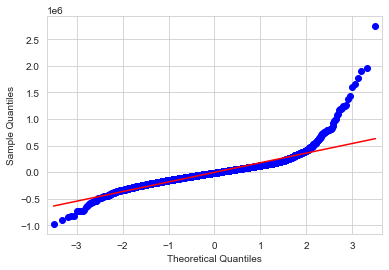

In [312]:
#calling linear_regression on base dataframe and normality using qqplot
linreg = linear_regression(df)

- 𝑅2  value of this model with statsmodels 70% .
- 𝑅2  value of this model with sci=kit learn 69%.

**Checking for Homoscedasticity**<br>
Checking whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

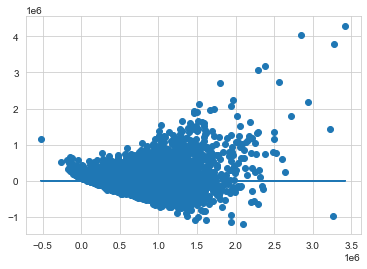

In [365]:
plt.scatter(model_1.predict(df[x_cols]), model_1.resid)
plt.plot(model_1.predict(df[x_cols]), [0 for i in range(len(df))])

This displays a fairly 'funnel' shape: errors appear to increase as the price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Model -2 Dealing with outliers


It's important to remove outliers from our data set, because they will negatively impact our model

In [366]:
df1 =df.copy()

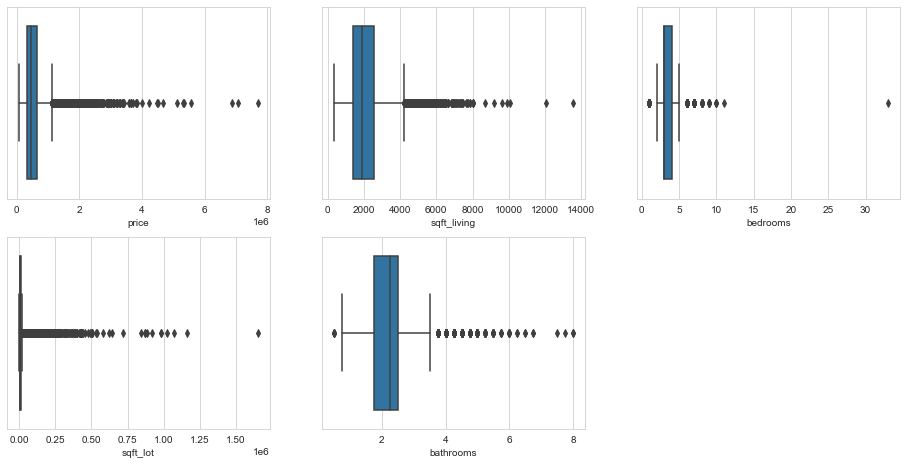

In [367]:
#plotting  a boxplot to check the outliers
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df1.price)
plt.subplot(332)
sns.boxplot(df1.sqft_living)
plt.subplot(333)
sns.boxplot(df1.bedrooms)
plt.subplot(334)
sns.boxplot(df1.sqft_lot)
plt.subplot(335)
sns.boxplot(df1.bathrooms)

In [ ]:
Observing the above boxplot eliminating the outliers in the features as below

In [368]:
print('Original dataset:',len(df1))
# Removing outliers from dataframe
df1 = df1[df1.price < 4000000]
df1 = df1[df1.sqft_living < 6000]
df1 = df1[df1.sqft_lot < 500000]
df1 = df1[df1.bedrooms < 5]
df1 = df1[df1.bathrooms < 4]
print('After removing outliers:',len(df1))

Original dataset: 21597
After removing outliers: 19462


In [369]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19462 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19462 non-null  float64
 1   bedrooms       19462 non-null  int64  
 2   bathrooms      19462 non-null  float64
 3   sqft_living    19462 non-null  int64  
 4   sqft_lot       19462 non-null  int64  
 5   floors         19462 non-null  float64
 6   waterfront     19462 non-null  int32  
 7   view           19462 non-null  int32  
 8   condition      19462 non-null  int64  
 9   grade          19462 non-null  int64  
 10  sqft_basement  19462 non-null  float64
 11  yr_built       19462 non-null  int64  
 12  yr_renovated   19462 non-null  float64
 13  zipcode        19462 non-null  int64  
 14  lat            19462 non-null  float64
 15  long           19462 non-null  float64
dtypes: float64(7), int32(2), int64(7)
memory usage: 2.4 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E4B8B57F0>,
      dtype=object)

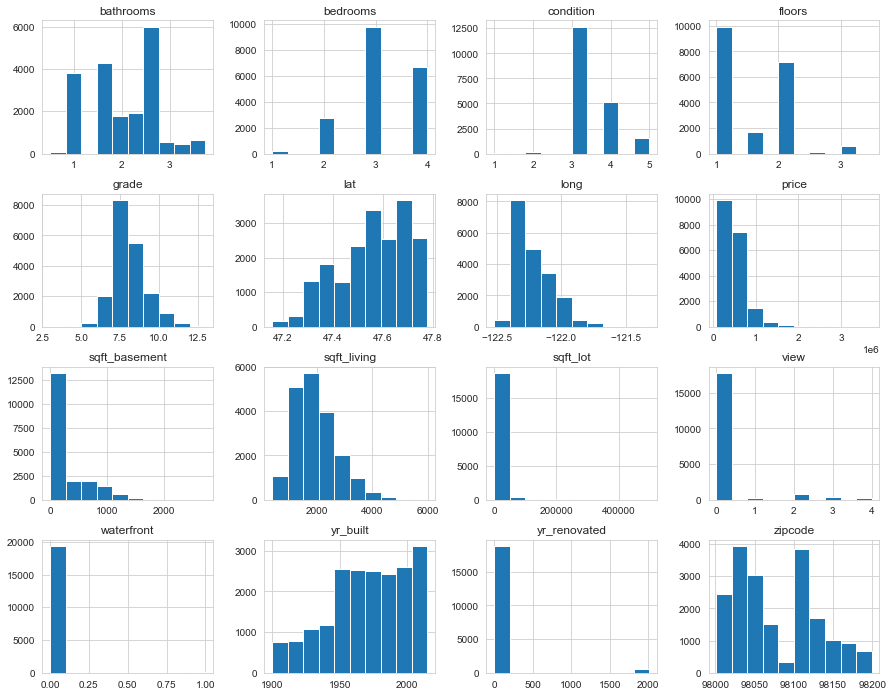

In [370]:
#plotting histgram of the dataframe after the removing the outliers
df1.hist(figsize=(15,12))

In [371]:
outcome = 'price'
x_cols = df1.drop(['price'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model_2 = ols(formula= f, data = df1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2888.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:29:17   Log-Likelihood:            -2.6130e+05
No. Observations:               19462   AIC:                         5.226e+05
Df Residuals:                   19446   BIC:                         5.228e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.335e+06   2.49e+06      2.944      0.003    2.45e+06    1.22e+07
bedrooms      -2.948e+04   2117.219    -13.925      0.000   -3.36e+04   -2.53e+04
bathrooms      2.714e+04   3016.388      8.998      0.000    2.12e+04    3.31e+04
sqft_living     147.6764      3.131     47.161      0.000     141.539     153.814
sqft_lot          0.0081      0.040      0.204      0.838      -0.069       0.086
floors         1.856e+04   3089.239      6.008      0.000    1.25e+04    2.46e+04
waterfront     4.572e+05   1.68e+04     27.166      0.000    4.24e+05     4.9e+05
view           5.636e+04   1900.024     29.661      0.000    5.26e+04    6.01e+04
condition      2.819e+04   2014.348     13.996      0.000    2.42e+04    3.21e+04
grade          1.002e+05   1831.865     54.693      0.000    9.66e+04    1.04e+05
sqft_basement   -13.9824      4.015     -3.482      0.000     -21.853      -6.112
yr_built      -2312.7721     63.188    -36.601      0.000   -2436.627   -2188.918
yr_renovated     23.7609      3.487      6.814      0.000      16.926      30.595
zipcode        -475.7501     28.345    -16.784      0.000    -531.308    -420.192
lat             5.82e+05   9136.279     63.705      0.000    5.64e+05       6e+05
long          -1.273e+05   1.11e+04    -11.503      0.000   -1.49e+05   -1.06e+05
==============================================================================
Omnibus:                    10728.191   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206039.968
Skew:                           2.241   Prob(JB):                         0.00
Kurtosis:                      18.297   Cond. No.                     2.10e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3893
Train MSE: 26952808576.223377
Test MSE: 26701411514.720837
RMSE Train: 164173.10552043346
RMSE Test: 163405.6654915026
R2 Score: 0.693


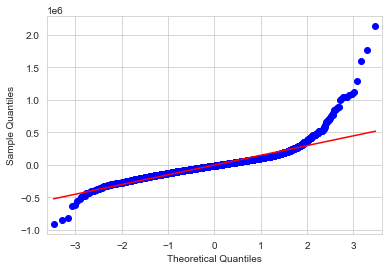

In [372]:
#calling function linear_regression

linreg = linear_regression(df1)

- $R^2$ value of this model with statsmodels 69% .
- $R^2$ value of this model with sci=kit learn 69%.

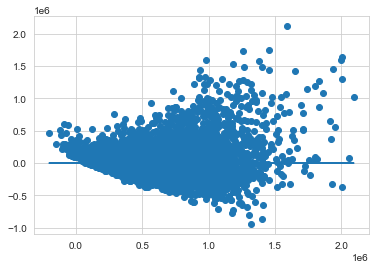

In [373]:
# Checking for Homoscedasticity
plt.scatter(model_2.predict(df1[x_cols]), model_2.resid)
plt.plot(model_2.predict(df1[x_cols]), [0 for i in range(len(df1))])

# Model-3 handling the categorical variables


To transform categorical variables is through using one-hot encoding or "dummy variables". The idea is to convert each category into a new column, and assign a 1 or 0 to the column. so creating dummy variables for the categorical features and chose to drop the first.

In [374]:
df2 = df1.copy()

In [375]:
df2.grade.unique()

array([ 7,  6,  8,  9,  5, 10, 12, 11,  4,  3, 13], dtype=int64)

In [376]:
#binning grade Feature
grade_bins = [0,3,6,7,9,13]
label=('a','b','c','d','e')
grade_binned = pd.cut(df2['grade'], grade_bins, labels= label)
grade_binned = grade_binned.cat.as_unordered()
df2['grade']= grade_binned

In [377]:
np.sort(df2['zipcode'].unique())

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [378]:
#binning the zipcode
zipcode_bins=[98000,98020,98040,98060,98080,98100,98120,98140,98159,98179,98199]
label=('a','b','c','d','e','f','g','h','i','j')
zipcode_binned=pd.cut(df2['zipcode'], zipcode_bins, labels= label)
zipcode_binned = zipcode_binned.cat.as_unordered()
df2['zipcode'] =zipcode_binned

In [379]:
#creating the dummy variables
waterfront_dummies = pd.get_dummies(df2.waterfront, prefix='waterfront', drop_first=True)
view_dummies= pd.get_dummies(df2.view, prefix='view', drop_first=True)
condition_dummies = pd.get_dummies(df2.condition, prefix='condition', drop_first=True)
grade_dummies = pd.get_dummies(df2.grade, prefix='grade', drop_first=True)
zipcode_dummies = pd.get_dummies(df2.zipcode, prefix='zipcode', drop_first=True)


In [380]:
bins = [ -1 , 1 , df1.yr_renovated.max() ]
labels = ['0','1']
df2.yr_renovated = pd.cut(df2.yr_renovated, bins, labels=labels)
renovated_dummies = pd.get_dummies(df2.yr_renovated, prefix='renovated', drop_first=True)

concat the dummy columns to our continuous variables and asign it to a new variable.

In [329]:
# Adding dummies to the dataset 
df2_dummies = pd.concat([df2,waterfront_dummies, view_dummies, condition_dummies, grade_dummies,
                        zipcode_dummies, renovated_dummies],axis=1)


Next, let's remove the original columns from our data and add the dummy columns instead

In [330]:
df2_dummies.drop(['waterfront','view','condition','grade','zipcode','yr_renovated','floors'], axis=1, inplace=True)

In [296]:
df2_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19462 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19462 non-null  float64
 1   bedrooms       19462 non-null  int64  
 2   bathrooms      19462 non-null  float64
 3   sqft_living    19462 non-null  int64  
 4   sqft_lot       19462 non-null  int64  
 5   sqft_basement  19462 non-null  float64
 6   yr_built       19462 non-null  int64  
 7   lat            19462 non-null  float64
 8   long           19462 non-null  float64
 9   waterfront_1   19462 non-null  uint8  
 10  view_1         19462 non-null  uint8  
 11  view_2         19462 non-null  uint8  
 12  view_3         19462 non-null  uint8  
 13  view_4         19462 non-null  uint8  
 14  condition_2    19462 non-null  uint8  
 15  condition_3    19462 non-null  uint8  
 16  condition_4    19462 non-null  uint8  
 17  condition_5    19462 non-null  uint8  
 18  grade_

In [297]:
outcome = 'price'
x_cols = df2_dummies.drop(['price'], axis = 1).columns

predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model_3 = ols(formula= f, data = df2_dummies).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1463.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:55:12   Log-Likelihood:            -2.6098e+05
No. Observations:               19462   AIC:                         5.220e+05
Df Residuals:                   19430   BIC:                         5.223e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.587e+07   1.68e+06    -15.433      0.000   -2.92e+07   -2.26e+07
bedrooms      -1.903e+04   2126.905     -8.948      0.000   -2.32e+04   -1.49e+04
bathrooms      2.735e+04   2910.156      9.398      0.000    2.16e+04    3.31e+04
sqft_living     179.4041      2.973     60.350      0.000     173.577     185.231
sqft_lot          0.0222      0.039      0.569      0.569      -0.054       0.099
sqft_basement   -41.6542      3.597    -11.582      0.000     -48.704     -34.605
yr_built      -1369.4654     64.014    -21.393      0.000   -1494.939   -1243.992
lat            5.875e+05   9764.549     60.165      0.000    5.68e+05    6.07e+05
long          -6954.3203   1.26e+04     -0.553      0.580   -3.16e+04    1.77e+04
waterfront_1   4.148e+05   1.88e+04     22.123      0.000    3.78e+05    4.52e+05
view_1          1.12e+05   9871.566     11.349      0.000    9.27e+04    1.31e+05
view_2         9.105e+04   6051.771     15.046      0.000    7.92e+04    1.03e+05
view_3         1.596e+05   8427.103     18.940      0.000    1.43e+05    1.76e+05
view_4         3.221e+05   1.32e+04     24.475      0.000    2.96e+05    3.48e+05
condition_2    3.687e+04    3.3e+04      1.116      0.264   -2.79e+04    1.02e+05
condition_3    4.361e+04   3.07e+04      1.421      0.155   -1.65e+04    1.04e+05
condition_4    7.776e+04   3.07e+04      2.533      0.011    1.76e+04    1.38e+05
condition_5     1.15e+05   3.09e+04      3.721      0.000    5.44e+04    1.76e+05
grade_b       -1.726e+05   1.62e+05     -1.068      0.286   -4.89e+05    1.44e+05
grade_c       -1.413e+05   1.62e+05     -0.874      0.382   -4.58e+05    1.76e+05
grade_d       -5.756e+04   1.62e+05     -0.356      0.722   -3.74e+05    2.59e+05
grade_e        1.953e+05   1.62e+05      1.207      0.228   -1.22e+05    5.13e+05
zipcode_b     -3.241e+04   4176.860     -7.760      0.000   -4.06e+04   -2.42e+04
zipcode_c     -7.036e+04   4466.054    -15.755      0.000   -7.91e+04   -6.16e+04
zipcode_d     -1.027e+05   5564.914    -18.461      0.000   -1.14e+05   -9.18e+04
zipcode_e     -6.778e+04   9753.835     -6.949      0.000   -8.69e+04   -4.87e+04
zipcode_f      3.539e+04   5100.248      6.938      0.000    2.54e+04    4.54e+04
zipcode_g     -5.856e+04   5882.678     -9.955      0.000   -7.01e+04    -4.7e+04
zipcode_h     -8.921e+04   6529.460    -13.663      0.000   -1.02e+05   -7.64e+04
zipcode_i      -1.11e+05   6640.955    -16.712      0.000   -1.24e+05    -9.8e+04
zipcode_j     -2.519e+04   7447.002     -3.382      0.001   -3.98e+04   -1.06e+04
renovated_1    6.673e+04   6883.493      9.694      0.000    5.32e+04    8.02e+04
==============================================================================
Omnibus:                    10314.627   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB

3893
Train MSE: 25924282885.62467
Test MSE: 26430590188.986313
RMSE Train: 161010.19497418375
RMSE Test: 162574.87563884622
R2 Score: 0.694


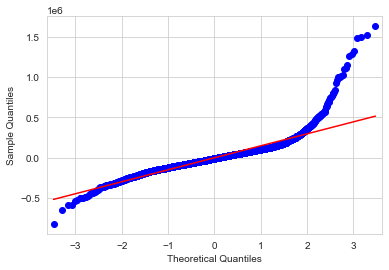

In [298]:
#calling the linear_regression function after handling catergorical variables
linreg = linear_regression(df2_dummies)

- 𝑅2  value of this model with statsmodels 70% .
- 𝑅2  value of this model with sci=kit learn 69%.

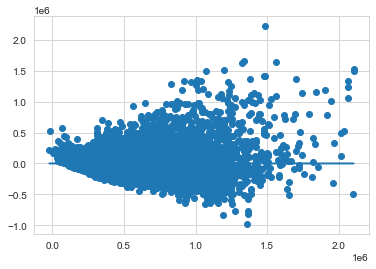

In [299]:
# Checking for Homoscedasticity
plt.scatter(model_3.predict(df2_dummies[x_cols]), model_3.resid)
plt.plot(model_3.predict(df2_dummies[x_cols]), [0 for i in range(len(df2_dummies))])

# Model-4  Applying  Logarithmic  Transforming on Model 3

In [300]:
df3=df2_dummies.copy()

In [301]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19462 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19462 non-null  float64
 1   bedrooms       19462 non-null  int64  
 2   bathrooms      19462 non-null  float64
 3   sqft_living    19462 non-null  int64  
 4   sqft_lot       19462 non-null  int64  
 5   sqft_basement  19462 non-null  float64
 6   yr_built       19462 non-null  int64  
 7   lat            19462 non-null  float64
 8   long           19462 non-null  float64
 9   waterfront_1   19462 non-null  uint8  
 10  view_1         19462 non-null  uint8  
 11  view_2         19462 non-null  uint8  
 12  view_3         19462 non-null  uint8  
 13  view_4         19462 non-null  uint8  
 14  condition_2    19462 non-null  uint8  
 15  condition_3    19462 non-null  uint8  
 16  condition_4    19462 non-null  uint8  
 17  condition_5    19462 non-null  uint8  
 18  grade_

In [302]:
non_normal = ['price', 'sqft_living', 'sqft_lot']
for feat in non_normal:
    df3[feat] = df3[feat].map(lambda x: np.log(x))


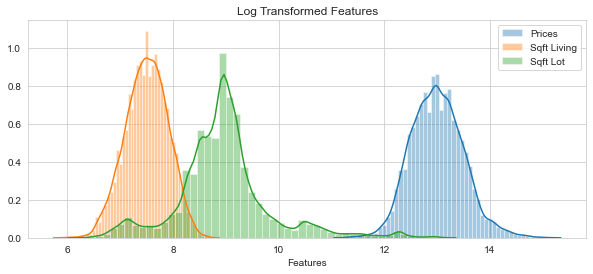

In [303]:
plt.figure(figsize=(10,4))
sns.distplot(df3.price, label='Prices')
sns.distplot(df3.sqft_living, label='Sqft Living')
sns.distplot(df3.sqft_lot, label='Sqft Lot')

plt.title('Log Transformed Features')
plt.xlabel('Features')
plt.legend()
plt.show()

In [304]:
outcome = 'price'
x_cols = df3.drop(['price'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model_4 = ols(formula= f, data = df3).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1886.
Date:                Fri, 15 Jan 2021   Prob (F-statistic):               0.00
Time:                        11:56:00   Log-Likelihood:                -464.31
No. Observations:               19462   AIC:                             992.6
Df Residuals:                   19430   BIC:                             1245.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -35.2196      2.580    -13.651      0.000     -40.277     -30.163
bedrooms         -0.0309      0.003     -9.178      0.000      -0.037      -0.024
bathrooms         0.0583      0.005     12.725      0.000       0.049       0.067
sqft_living       0.5503      0.010     57.462      0.000       0.532       0.569
sqft_lot          0.0101      0.003      3.856      0.000       0.005       0.015
sqft_basement -7.195e-05   5.53e-06    -13.001      0.000   -8.28e-05   -6.11e-05
yr_built         -0.0023      0.000    -23.030      0.000      -0.003      -0.002
lat               1.3435      0.015     89.620      0.000       1.314       1.373
long              0.1236      0.019      6.420      0.000       0.086       0.161
waterfront_1      0.3958      0.029     13.733      0.000       0.339       0.452
view_1            0.2059      0.015     13.576      0.000       0.176       0.236
view_2            0.1660      0.009     17.867      0.000       0.148       0.184
view_3            0.2338      0.013     18.080      0.000       0.208       0.259
view_4            0.3731      0.020     18.460      0.000       0.334       0.413
condition_2       0.0772      0.051      1.522      0.128      -0.022       0.177
condition_3       0.1838      0.047      3.897      0.000       0.091       0.276
condition_4       0.2444      0.047      5.181      0.000       0.152       0.337
condition_5       0.3013      0.047      6.345      0.000       0.208       0.394
grade_b          -0.6286      0.248     -2.531      0.011      -1.115      -0.142
grade_c          -0.5124      0.248     -2.063      0.039      -0.999      -0.025
grade_d          -0.3130      0.249     -1.260      0.208      -0.800       0.174
grade_e          -0.0169      0.249     -0.068      0.946      -0.504       0.471
zipcode_b        -0.0356      0.006     -5.541      0.000      -0.048      -0.023
zipcode_c        -0.0818      0.007    -11.927      0.000      -0.095      -0.068
zipcode_d        -0.0790      0.009     -9.232      0.000      -0.096      -0.062
zipcode_e        -0.0798      0.015     -5.327      0.000      -0.109      -0.050
zipcode_f         0.1385      0.008     16.902      0.000       0.122       0.155
zipcode_g        -0.0140      0.009     -1.531      0.126      -0.032       0.004
zipcode_h        -0.1116      0.010    -11.062      0.000      -0.131      -0.092
zipcode_i        -0.1770      0.010    -17.334      0.000      -0.197      -0.157
zipcode_j        -0.0128      0.011     -1.113      0.266      -0.035       0.010
renovated_1       0.0815      0.011      7.708      0.000       0.061       0.102
==============================================================================
Omnibus:                      466.623   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB

3893
Train MSE: 0.061275157957496704
Test MSE: 0.062086696973421146
RMSE Train: 0.24753819494675303
RMSE Test: 0.24917202285453546
R2 Score: 0.752


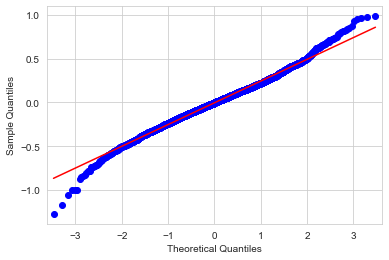

In [305]:
#calling the linear_regression function after handling catergorical variables
linreg = linear_regression(df3)

𝑅2 value of this model with statsmodels 75% .<br>
𝑅2 value of this model with sci=kit learn 75%.

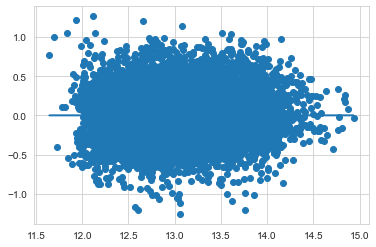

In [306]:
# Checking for Homoscedasticity
plt.scatter(model_4.predict(df3[x_cols]), model_4.resid)
plt.plot(model_4.predict(df3[x_cols]), [0 for i in range(len(df3))])

Scatter plot shows the data are homoscedastic (means the residuals are equal across the regression line).

# Conclusion


- After making necessary cleaning and modification of our data, model-4 performs with 75% accuracy across all of the data.

- Selected important features and rejected the ones that can negatively impact result of the prediction.

- Location and size of the house have biggest impact on house price.